## **Import**

In [55]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline

## *1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).*

In [56]:
df = pd.read_csv('./data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
# mengecek ukuran data
df.shape

# informasi tentang data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
# encoding kategorikal
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


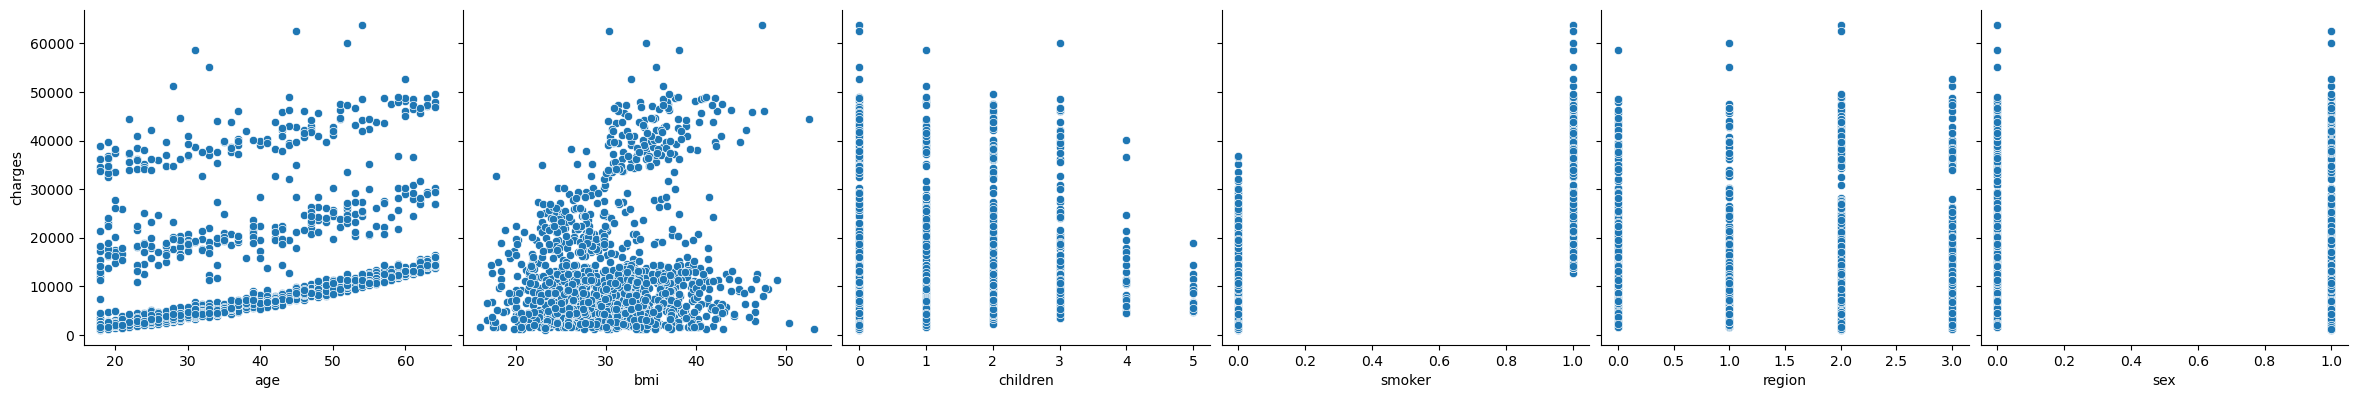

In [59]:
# operasi visualisasi
sns.pairplot(df, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

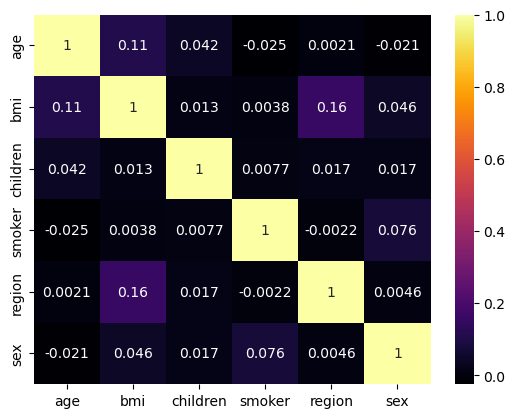

In [60]:
corr = df[['age', 'bmi','children', 'smoker', 'region', 'sex']].corr()
sns.heatmap(corr, annot=True, cmap='inferno')

In [61]:
# Variabel target (biaya medis personal)
target_variable = df['charges']

# Variabel bebas (fitur) yang dipilih
independent_variables = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Menampilkan beberapa baris pertama dari data
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


## *2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.*

In [62]:
# Memisahkan fitur (X) dan target (y)
X = df[['age', 'bmi', 'children', 'smoker', 'region', 'sex']]
y = df['charges']

# Pembagian data latih dan data uji dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Menampilkan ukuran dari data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 936
Jumlah data uji: 402


 ## *3. Lakukan feature scaling jika diperlukan.*

## *4. Buat model multiple linear regression menggunakan Scikit-Learn.*

In [63]:
# Membuat transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'bmi', 'children']),  # Normalisasi variabel numerik
    (OneHotEncoder(), ['sex', 'smoker', 'region'])  # Encode variabel kategorikal
)

In [64]:
# Membuat model
model = LinearRegression()
model_pipeline = make_pipeline(preprocessor, model)

## *5. Latih model pada data latih dan lakukan prediksi pada data uji.*

In [65]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [66]:
# Melakukan prediksi
y_pred = model_pipeline.predict(X_test)

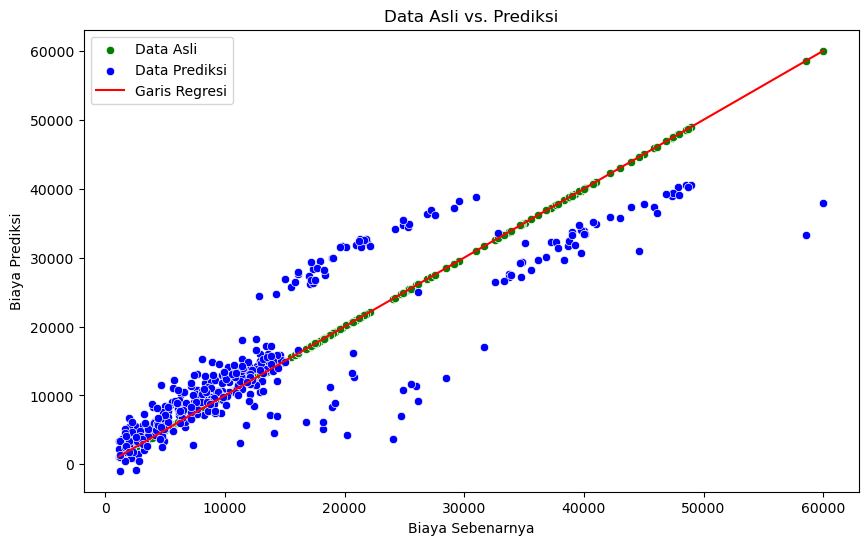

In [71]:
# Plot Data Asli dan Prediksi dengan warna yang berbeda
plt.figure(figsize=(10, 6))

# Scatter plot data asli (biru)
sns.scatterplot(x=y_test, y=y_test, color='green', label='Data Asli')

# Scatter plot data prediksi (merah)
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Data Prediksi')

# Garis regresi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis Regresi')

plt.xlabel("Biaya Sebenarnya")
plt.ylabel("Biaya Prediksi")
plt.title("Data Asli vs. Prediksi")
plt.legend()
plt.show()

## *6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.*

In [72]:
# Menghitung metrik
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'R-squared: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

R-squared: 0.78
MSE: 32345536.75
MAE: 3943.24
